# Análisis de Regresión Lineal y Prueba de Hipotesis en el Contexto del EDA
## Un Ejemplo Práctico con el Dataset `tips`

### Objetivo de este análisis:
Vamos a demostrar cómo la **regresión lineal** es una extensión natural del Análisis Exploratorio de Datos (EDA). Partiremos de la exploración visual, cuantificaremos relaciones y validaremos nuestros hallazgos.

---

## Paso 1: Configuración Inicial y Carga de Datos

Antes de comenzar cualquier análisis, es crucial preparar nuestro ambiente de trabajo. En este paso:

1. Importaremos las librerías necesarias
2. Cargaremos el dataset `tips` de Seaborn
3. Obtendremos una primera impresión de los datos

**Preguntas para reflexionar:**
- ¿Qué tipo de datos contiene este dataset?
- ¿Qué variables podrían estar relacionadas?
- ¿Qué hipótesis iniciales podemos formular?

**Dataset `tips`**: Contiene registros de propinas en un restaurante durante varios días.

In [ ]:
# ====================
# 1. CONFIGURACIÓN INICIAL
# ====================
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Cargar los datos
df = sns.load_dataset('tips')
print("📊 Primer vistazo a los datos:")
print(df.head())
print(f"\n📈 Forma del dataset: {df.shape}")
print(f"📋 Columnas: {df.columns.tolist()}")
print("\n🔍 Información general:")
print(df.info())
print("\n📊 Estadísticas descriptivas:")
print(df.describe())






📊 Primer vistazo a los datos:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

📈 Forma del dataset: (244, 7)
📋 Columnas: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

🔍 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), in

## Paso 2: Análisis Univariado - Conociendo Nuestras Variables

Antes de buscar relaciones entre variables, debemos entender cada variable por separado.

### Objetivos de este paso:
- Comprender la distribución de cada variable
- Identificar valores atípicos potenciales
- Conocer medidas de tendencia central y dispersión

**Variables clave:**
- `total_bill`: Consumo total de la cuenta
- `tip`: Monto de la propina

**Preguntas:**
- ¿Cómo se distribuyen los montos de las cuentas?
- ¿Cuál es el rango típico de propinas?
- ¿Hay asimetría en las distribuciones?

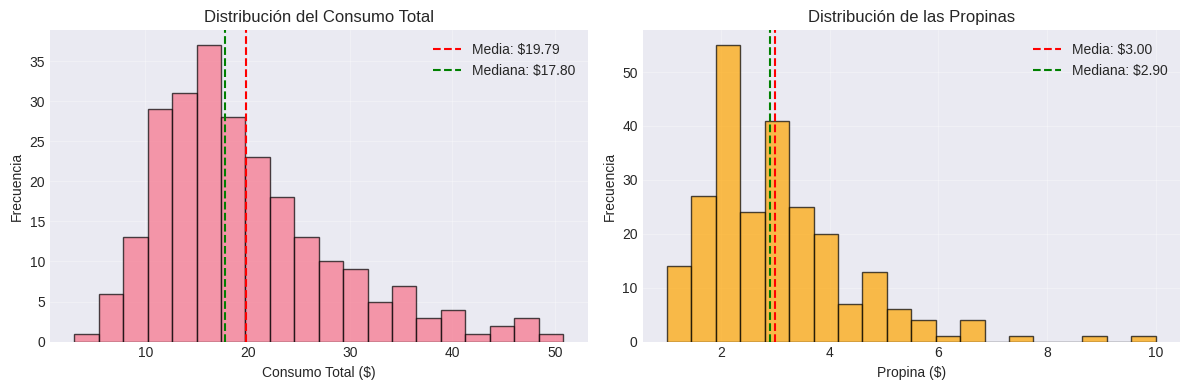

In [ ]:
# ====================
# 2. ANALISIS UNIVARIADO - ¿Cómo son nuestras variables clave?
# ====================
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribución de total_bill
axes[0].hist(df['total_bill'], bins=20, edgecolor='black', alpha=0.7)
axes[0].axvline(df['total_bill'].mean(), color='red', linestyle='--', label=f'Media: ${df["total_bill"].mean():.2f}')
axes[0].axvline(df['total_bill'].median(), color='green', linestyle='--', label=f'Mediana: ${df["total_bill"].median():.2f}')
axes[0].set_xlabel('Consumo Total ($)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Consumo Total')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribución de tip
axes[1].hist(df['tip'], bins=20, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(df['tip'].mean(), color='red', linestyle='--', label=f'Media: ${df["tip"].mean():.2f}')
axes[1].axvline(df['tip'].median(), color='green', linestyle='--', label=f'Mediana: ${df["tip"].median():.2f}')
axes[1].set_xlabel('Propina ($)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de las Propinas')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## Paso 3: Análisis Bivariado - Explorando Relaciones Visualmente

Ahora que conocemos nuestras variables individualmente, buscamos relaciones entre ellas.

### El corazón del EDA:
Los gráficos de dispersión (scatterplots) son nuestra herramienta principal para detectar relaciones visuales entre variables continuas.

**Coeficiente de correlación de Pearson:**
- Rango: -1 a 1
- 0 = No hay correlación lineal
- +1 = Correlación lineal positiva perfecta
- -1 = Correlación lineal negativa perfecta

**Preguntas durante la visualización:**
- ¿Se observa una tendencia lineal?
- ¿La relación parece constante en todo el rango?
- ¿Hay observaciones que se desvían del patrón general?


🔗 Correlación entre consumo total y propina:
Coeficiente de correlación de Pearson: 0.676
Interpretación: Correlación positiva moderada-fuerte


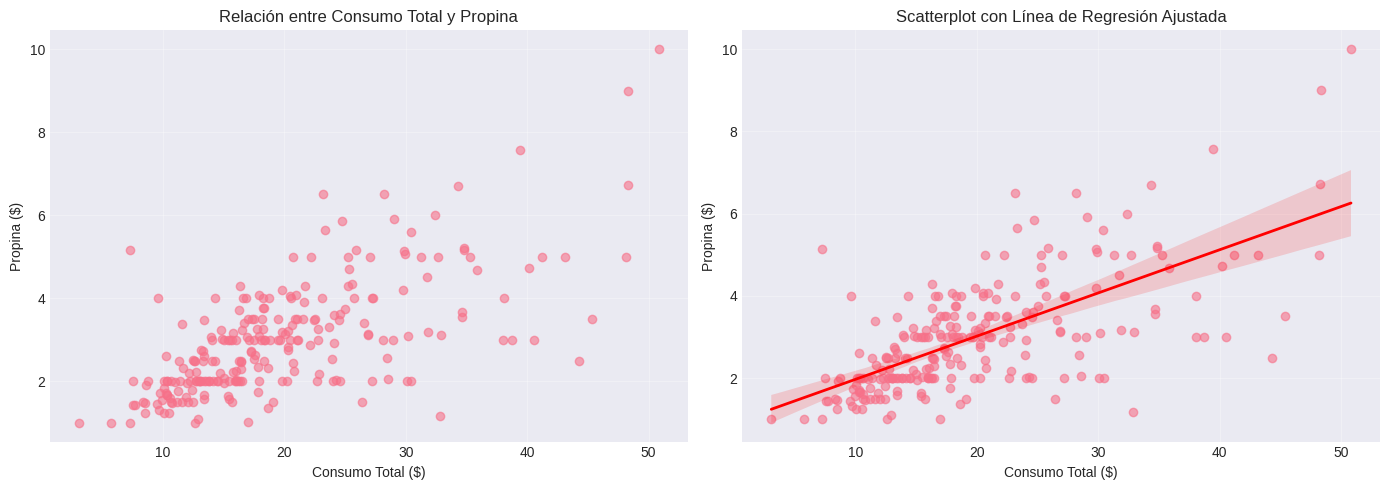

In [ ]:
# ====================
# 3. ANALISIS BIVARIADO - ¿Hay relación visual?
# ====================
print("\n🔗 Correlación entre consumo total y propina:")
correlation = df['total_bill'].corr(df['tip'])
print(f"Coeficiente de correlación de Pearson: {correlation:.3f}")
print("Interpretación: Correlación positiva moderada-fuerte")

# Scatterplot básico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatterplot simple
axes[0].scatter(df['total_bill'], df['tip'], alpha=0.6)
axes[0].set_xlabel('Consumo Total ($)')
axes[0].set_ylabel('Propina ($)')
axes[0].set_title('Relación entre Consumo Total y Propina')
axes[0].grid(True, alpha=0.3)

# Scatterplot con regresión lineal visual (sólo visual)
sns.regplot(x='total_bill', y='tip', data=df, ax=axes[1],
            scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'linewidth':2})
axes[1].set_xlabel('Consumo Total ($)')
axes[1].set_ylabel('Propina ($)')
axes[1].set_title('Scatterplot con Línea de Regresión Ajustada')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Paso 4: Regresión Lineal Simple - Cuantificando la Relación

Hemos visto una tendencia visual; ahora la cuantificaremos matemáticamente.

### ¿Qué es la regresión lineal?
Es un modelo estadístico que encuentra la **mejor línea recta** que describe la relación entre dos variables.

**Ecuación: y = β₀ + β₁x + ε**
- **y**: Variable dependiente (propina)
- **x**: Variable independiente (consumo total)
- **β₀**: Intercepto (valor de y cuando x = 0)
- **β₁**: Pendiente (cambio en y por unidad de cambio en x)
- **ε**: Error (lo que el modelo no explica)

**Objetivo:** Encontrar β₀ y β₁ que minimicen la suma de errores al cuadrado.

In [ ]:
# ====================
# 4. REGRESIÓN LINEAL - Versión Mínima
# ====================
print("\n📈 REGRESIÓN LINEAL SIMPLE")

# Modelo
modelo = smf.ols('tip ~ total_bill', data=df).fit()

# Resultados esenciales
params = modelo.params
conf_int = modelo.conf_int()

print(f"\n📊 ECUACIÓN:")
print(f"tip = {params['Intercept']:.3f} + {params['total_bill']:.3f} * total_bill")

print(f"\n📈 MÉTRICAS:")
print(f"• R² = {modelo.rsquared:.3f} ({modelo.rsquared*100:.1f}%)")
print(f"• p-valor pendiente = {modelo.pvalues['total_bill']:.5f}")
print(f"• IC95% pendiente = [{conf_int.loc['total_bill', 0]:.3f}, {conf_int.loc['total_bill', 1]:.3f}]")

print(f"\n💡 INTERPRETACIÓN:")
print(f"Por cada $1 adicional en la cuenta, la propina aumenta ${params['total_bill']:.3f}")
print(f"Significativo: {'SÍ' if modelo.pvalues['total_bill'] < 0.05 else 'NO'}")


📈 REGRESIÓN LINEAL SIMPLE

📊 ECUACIÓN:
tip = 0.920 + 0.105 * total_bill

📈 MÉTRICAS:
• R² = 0.457 (45.7%)
• p-valor pendiente = 0.00000
• IC95% pendiente = [0.091, 0.120]

💡 INTERPRETACIÓN:
Por cada $1 adicional en la cuenta, la propina aumenta $0.105
Significativo: SÍ


In [ ]:
# ====================
# 5. INTERPRETACIÓN PASO A PASO
# ====================
print("\n🎯 INTERPRETACIÓN PARA NO ESTADÍSTICOS:")
print("-"*40)

# Extraer los coeficientes
intercepto = resultados.params['const']
pendiente = resultados.params['total_bill']

print(f"1. ECUACIÓN DEL MODELO:")
print(f"   Propina = {intercepto:.3f} + {pendiente:.3f} * Consumo_Total")
print()

print(f"2. INTERPRETACIÓN DE COEFICIENTES:")
print(f"   • Intercepto (β₀): ${intercepto:.3f}")
print(f"     'Cuando el consumo total es $0, la propina esperada es ${intercepto:.3f}'")
print(f"     (Interpretación práctica limitada, pocas cuentas son $0)")
print()
print(f"   • Pendiente (β₁): {pendiente:.3f}")
print(f"     'Por cada DÓLAR adicional en el consumo total,")
print(f"     la propina aumenta en ${pendiente:.3f} en promedio'")
print(f"     'Por cada $10 adicionales, la propina aumenta en ${pendiente*10:.3f}'")
print()

# Ejemplo concreto
consumo_ejemplo = 30
propina_predicha = intercepto + pendiente * consumo_ejemplo
print(f"3. EJEMPLO CONCRETO:")
print(f"   Para una cuenta de ${consumo_ejemplo}:")
print(f"   Propina esperada = {intercepto:.3f} + {pendiente:.3f}*{consumo_ejemplo}")
print(f"                    = ${propina_predicha:.2f}")
print()

# R-cuadrado
r_cuadrado = resultados.rsquared
print(f"4. BONDAD DEL AJUSTE (R²): {r_cuadrado:.3f} o {r_cuadrado*100:.1f}%")
print(f"   'El consumo total explica el {r_cuadrado*100:.1f}% de la variación")
print(f"    en las propinas.'")
print(f"   'Es un ajuste razonable para datos sociales/restaurante.'")
print()

# Significancia estadística
p_valor = resultados.pvalues['total_bill']
print(f"5. SIGNIFICANCIA ESTADÍSTICA:")
print(f"   p-valor para la pendiente: {p_valor:.4f}")
if p_valor < 0.05:
    print(f"   ✓ p < 0.05 → Rechazamos H₀: 'La pendiente NO es cero'")
    print(f"   ✓ Hay evidencia de que existe relación lineal significativa")
else:
    print(f"   ✗ p ≥ 0.05 → No rechazamos H₀")
    print(f"   ✗ No hay evidencia suficiente de relación lineal")


🎯 INTERPRETACIÓN PARA NO ESTADÍSTICOS:
----------------------------------------
1. ECUACIÓN DEL MODELO:
   Propina = 0.920 + 0.105 * Consumo_Total

2. INTERPRETACIÓN DE COEFICIENTES:
   • Intercepto (β₀): $0.920
     'Cuando el consumo total es $0, la propina esperada es $0.920'
     (Interpretación práctica limitada, pocas cuentas son $0)

   • Pendiente (β₁): 0.105
     'Por cada DÓLAR adicional en el consumo total,
     la propina aumenta en $0.105 en promedio'
     'Por cada $10 adicionales, la propina aumenta en $1.050'

3. EJEMPLO CONCRETO:
   Para una cuenta de $30:
   Propina esperada = 0.920 + 0.105*30
                    = $4.07

4. BONDAD DEL AJUSTE (R²): 0.457 o 45.7%
   'El consumo total explica el 45.7% de la variación
    en las propinas.'
   'Es un ajuste razonable para datos sociales/restaurante.'

5. SIGNIFICANCIA ESTADÍSTICA:
   p-valor para la pendiente: 0.0000
   ✓ p < 0.05 → Rechazamos H₀: 'La pendiente NO es cero'
   ✓ Hay evidencia de que existe relación lineal



## **La prueba de hipótesis dentro del análisis bivariado en el EDA**

### **La dimensión inferencial del análisis bivariado en el EDA**

Aunque el análisis exploratorio de datos se fundamenta, ante todo, en una aproximación descriptiva y visual, resulta metodológicamente pertinente incorporar una primera evaluación inferencial que permita valorar si los patrones observados podrían atribuirse al azar. El objetivo no es “demostrar” relaciones, sino examinar su **plausibilidad estadística** bajo condiciones controladas. Esta integración es especialmente relevante cuando el diagrama de dispersión sugiere una tendencia sistemática, como ocurre en la relación entre `total_bill` y `tip`.

### **Formulación del contraste de hipótesis**

Para formalizar esta evaluación se adopta el marco clásico de contraste sobre el parámetro de pendiente del modelo lineal simple:

* **H₀ (hipótesis nula):** β₁ = 0
  No existe relación lineal en la población; cualquier patrón observado es atribuible a variación aleatoria.

* **H₁ (hipótesis alternativa):** β₁ ≠ 0
  La pendiente difiere de cero; existe evidencia de asociación lineal en la población.

La formulación explícita de estas hipótesis sitúa la regresión lineal como herramienta instrumental dentro del análisis bivariado, y no como un procedimiento orientado únicamente a la modelización.

### **Relación entre la evidencia visual y la inferencia estadística**

El proceso comienza con una inspección gráfica que sugiere una tendencia ascendente entre ambas variables. Sin embargo, dicha evidencia visual no asegura que el patrón sea estadísticamente consistente a nivel poblacional. De ahí la necesidad de articular una prueba formal que evalúe si la relación observada podría emerger únicamente por fluctuaciones muestrales. Esta interacción entre observación y contraste constituye un núcleo epistemológico del EDA riguroso.

### **Interpretación del p-valor como medida de plausibilidad bajo H₀**

En este contexto, el p-valor adquiere un significado claro: representa la probabilidad de obtener una relación igual o más extrema que la observada si, en realidad, **la pendiente poblacional fuera cero**. Valores pequeños indican que tal patrón sería improbable si H₀ fuera cierta, lo que conduce a cuestionar la validez de la hipótesis nula. Es importante enfatizar que un p-valor reducido no confirma la alternativa, sino que sugiere que el patrón observado es difícilmente atribuible al azar.

### **El papel complementario de los intervalos de confianza**

A diferencia del p-valor, el intervalo de confianza del coeficiente proporciona información substantiva adicional:

* cuantifica la **magnitud** del efecto,
* expresa la **incertidumbre** asociada a su estimación.

En el contexto del EDA, la combinación de inferencia visual, contraste de hipótesis e intervalos de confianza ofrece una base robusta para valorar no solo la presencia de una relación, sino también su estabilidad y relevancia práctica.

### **Pertinencia del modelo lineal en esta fase del EDA**

La regresión lineal simple que se aplica a continuación debe entenderse como una herramienta interpretativa dentro del análisis bivariado exploratorio, no como un procedimiento definitivo. Su utilidad reside en proporcionar un marco formal que cuantifique y someta a contraste la tendencia inicialmente detectada, permitiendo evaluar la coherencia entre la evidencia visual y la evidencia estadística.




### **Paso 5: Interpretación de Resultados - Traducir Números a Insights**

Los coeficientes de regresión son sólo números hasta que los interpretamos en contexto.

## Puntos clave de interpretación:

### **1. Pendiente (β₁):**
- "Por cada unidad que aumenta X, Y aumenta/disminuye en β₁ unidades"
- En nuestro caso: "Por cada dólar adicional en la cuenta, la propina aumenta β₁ dólares"

### **2. Intercepto (β₀):**
- "El valor esperado de Y cuando X es cero"
- No siempre tiene interpretación práctica significativa

### **3. R² (R-cuadrado):**
- "Porcentaje de la variabilidad en Y explicada por X"
- Entre 0% (nada) y 100% (todo)

### **4. Intervalo de Confianza (IC) 95%:**
- **"El rango plausible donde probablemente se encuentra el valor real del parámetro poblacional"**
- **Interpretación:** "Tenemos 95% de confianza de que la pendiente real se encuentra entre [LÍMITE INFERIOR] y [LÍMITE SUPERIOR]"
- **En nuestro caso:** "Estamos 95% seguros de que, por cada dólar adicional en la cuenta, la propina aumenta entre [LÍMITE INFERIOR] y [LÍMITE SUPERIOR]"

## **5. p-valor:**
- "Probabilidad de observar estos resultados si no hubiera relación real"
- p < 0.05: Evidencia estadística de relación

## **6. Conexión clave: IC vs p-valor**
- **Regla práctica:** Si el intervalo de confianza **NO incluye el cero** → p-valor < 0.05 (relación significativa)
- **Significado:** Si todo el rango plausible está por encima (o por debajo) de 0, es evidencia sólida de que existe una relación real


### **¿Por qué el IC es más informativo?**
El p-valor sólo responde "¿Existe relación?". El intervalo de confianza responde además: "¿Qué tan grande es el efecto?" y "¿Con qué precisión lo estimamos?"


## 🔍 El p-valor como Detective

Eres detective y encuentras a alguien con:
- Guantes negros
- Una bolsa con joyas
- Cerca de una joyería robada

**H₀ (Inocencia):** "Es sólo coincidencia"
**Evidencia:** Los 3 elementos juntos

**p-valor:** "¿Cuál es la probabilidad de que alguien INOCENTE tenga estas 3 cosas por pura coincidencia?"

- Si la probabilidad es BAJA (p < 0.05): "Demasiada coincidencia, lo arresto"
- Si la probabilidad es ALTA (p > 0.05): "Podría ser coincidencia, no tengo pruebas suficientes"

## 💡 Frases para Recordar

### Sobre p-valor:
- "Probabilidad de ver algo TAN extremo como lo observado, si la hipótesis nula fuera verdadera"
- "NO es la probabilidad de que H₀ sea verdadera" ← ¡ERROR COMÚN!
- "Medida de sorpresa: p pequeño = ¡Wow, qué raro si H₀ fuera cierta!"

### Sobre α = 0.05:
- "Nuestro umbral de 'sorpresa aceptable'"
- "Estamos dispuestos a equivocarnos 1 de cada 20 veces"
- "Límite entre 'coincidencia plausible' y 'demasiada coincidencia'"

### Decisión:
- **p < 0.05**: "La evidencia es suficientemente fuerte para decir 'aquí pasa algo'"
- **p > 0.05**: "No tenemos evidencia suficiente para decir que hay algo interesante"

# **Intervalos de Confianza en Regresión Lineal**

## A. Qué es un intervalo de confianza

Un **intervalo de confianza (IC)** es un rango de valores que, bajo un modelo estadístico y un nivel de confianza (habitualmente 95%), identifica los valores del parámetro poblacional que son compatibles con los datos observados. Desde la perspectiva frecuentista, un IC del 95% no indica que el parámetro tenga una probabilidad del 95% de encontrarse dentro del intervalo; más bien establece que, si se repitiera el proceso de muestreo reiteradamente, el 95% de los intervalos construidos de este modo contendrían el valor verdadero del parámetro.

En términos operativos, el IC constituye una **medida explícita de incertidumbre**, ofreciendo un rango continuo de valores plausibles para el parámetro en lugar de una decisión dicotómica.

---

## B. Intervalos de confianza en la regresión lineal bivariada

El modelo de regresión lineal simple se expresa como:

$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,
$$

donde $\beta_1$ representa la pendiente poblacional: el cambio promedio en $Y$ asociado a una unidad de cambio en $X$. La estimación $\hat{\beta}_1$ se acompaña de un intervalo de confianza al 95%, definido como:

$$
IC_{95\%}(\beta_1) = \left[ \hat{\beta}_1 - t_{\alpha/2} \cdot SE(\hat{\beta}_1),\ \hat{\beta}_1 + t_{\alpha/2} \cdot SE(\hat{\beta}_1) \right]
$$

Este intervalo comunica:

* **Magnitud del efecto**
* **Dirección** (positiva o negativa)
* **Precisión** (amplitud del intervalo)
* **Plausibilidad** de los valores compatibles con los datos

---

## C. Relación del intervalo de confianza con el p-value

El contraste inferencial habitual en regresión bivariada es:

$$
H_0: \beta_1 = 0 \quad\text{vs.}\quad H_1: \beta_1 \neq 0
$$

Si $\beta_1 = 0$, la recta es horizontal y no existe relación lineal entre $X$ e $Y$.
El estadístico $t$ se define como:

$$
t = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)},
$$

y el **p-value** evalúa cuán compatibles son los datos con la hipótesis nula de pendiente nula.

---

## D. Conexión conceptual y matemática entre IC y p-value

En un contraste bilateral al 5%, se cumple la equivalencia:

$$
\hat{\beta}_1 \text{ es significativa} \quad \iff \quad 0 \notin IC_{95\%}(\beta_1)
$$

Es decir:

* **Si el IC excluye 0**, entonces el p-value es **menor que 0.05**
* **Si el IC incluye 0**, entonces el p-value es **mayor que 0.05**

Ambos procedimientos contienen la misma información inferencial, pero el **IC es más informativo**, pues aporta magnitud, dirección y precisión del efecto.

---

## E. Por qué esto es útil en un EDA bivariado

Aunque el EDA es fundamentalmente descriptivo, incorporar la regresión lineal bivariada permite enriquecer la interpretación. Analizar conjuntamente:

* el diagrama de dispersión
* la recta ajustada
* la pendiente estimada
* el intervalo de confianza
* el p-value

permite comprender no solo la presencia de una tendencia, sino también su **estabilidad** y **precisión**.

La secuencia conceptual es:

1. **Correlación** → evalúa fuerza y dirección de la asociación
2. **Regresión bivariada** → cuantifica el cambio promedio
3. **Intervalo de confianza** → expresa la incertidumbre del efecto
4. **p-value** → evalúa compatibilidad con la hipótesis de ausencia de relación

---

## F. Síntesis final

* El intervalo de confianza expresa **incertidumbre** y **plausibilidad** del efecto estimado
* En regresión bivariada, permite evaluar la **intensidad** y la **estabilidad** de la relación
* El p-value contrasta si la pendiente podría explicarse por azar
* Ambos conceptos están conectados: **si el IC excluye el 0, el p-value es significativo**, y viceversa
* En el EDA, esta combinación permite lecturas más rigurosas sin abandonar el carácter exploratorio

### Paso 6: Diagnósticos del Modelo - Validando Nuestros Supuestos

Un modelo estadístico es sólo tan bueno como la validez de sus supuestos.

### Los 4 supuestos principales de la regresión lineal:

1. **Linealidad**: La relación entre X e Y es lineal
   - Verificar: Residuos vs Predicciones (debe ser aleatorio)

2. **Independencia**: Las observaciones son independientes entre sí
   - Depende del diseño del estudio

3. **Normalidad**: Los residuos siguen una distribución normal
   - Verificar: QQ-plot, histograma de residuos

4. **Homocedasticidad**: Varianza constante de los residuos
   - Verificar: Residuos vs Predicciones (sin patrones de embudo)

**Preguntas críticas:**
- ¿Nuestro modelo cumple estos supuestos?
- ¿Qué limitaciones encontramos?

### 🍪 Normalidad de Residuos: La Máquina de Galletas Perfecta

Imagina una máquina que hace galletas de 10cm de diámetro:

**Residuo = Galleta real - 10cm**

### Si la máquina es "normal":
- La mayoría mide ~10cm (residuos cerca de 0)
- Algunas miden 9.8cm o 10.2cm (residuos pequeños)
- Pocas miden 9.5cm o 10.5cm (residuos grandes)
- Casi ninguna mide 8cm o 12cm (residuos enormes)

### Esto en gráficos:
1. **Histograma de residuos**:
   - Forma de campana ✓
   - Centro en 0 ✓

2. **QQ-plot**:
   - Puntos siguen la línea diagonal ✓
   - "Si los residuos fueran perfectamente normales..."

### ¿Por qué nos importa?
Porque nuestras pruebas (p-valores) asumen que los "errores" (residuos) se distribuyen así.


🔍 DIAGNÓSTICOS: ¿Es un buen modelo? (Verificando supuestos)


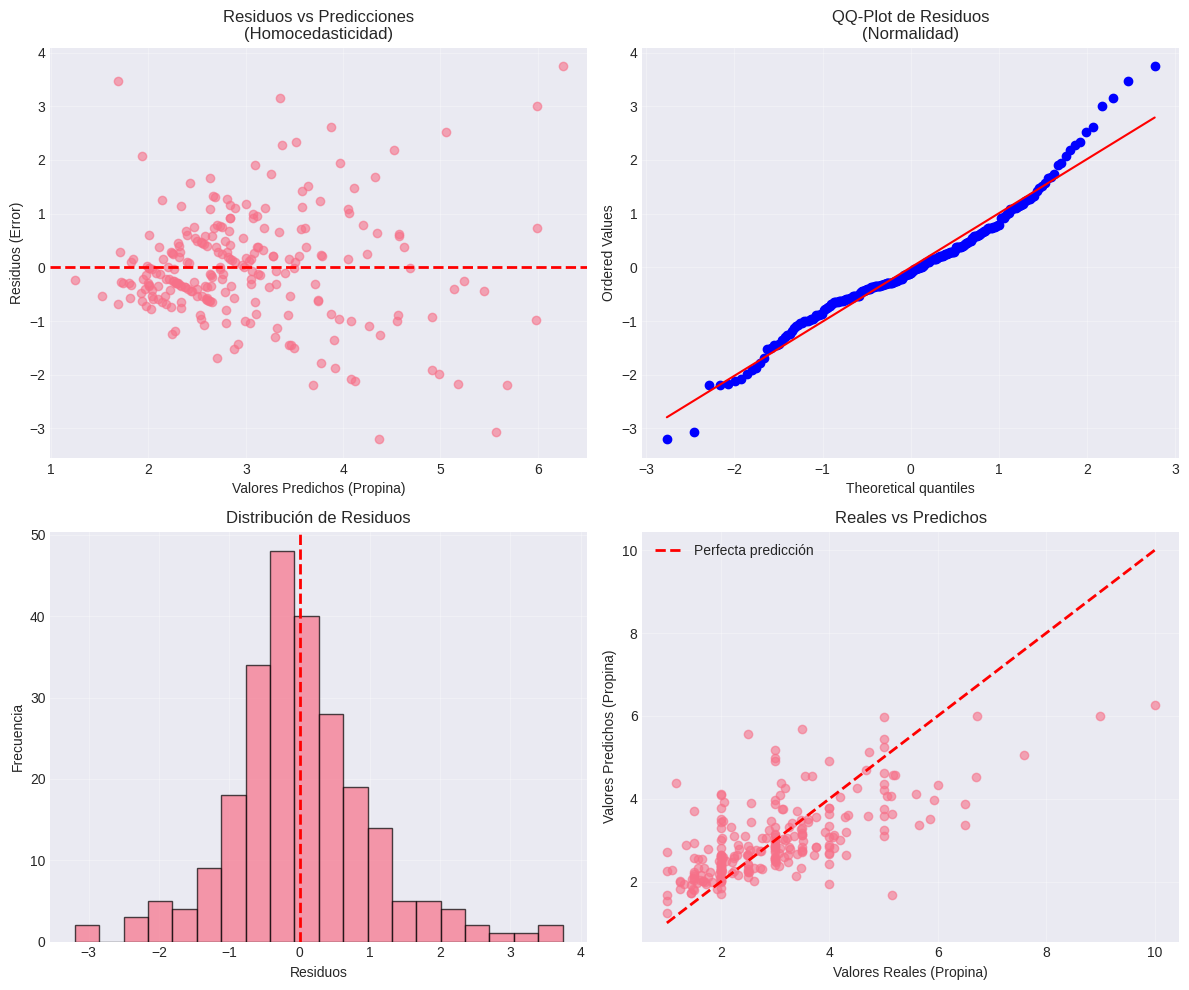

In [ ]:
# ====================
# 6. DIAGNÓSTICOS DEL MODELO - Validando supuestos
# ====================
print("\n" + "="*60)
print("🔍 DIAGNÓSTICOS: ¿Es un buen modelo? (Verificando supuestos)")
print("="*60)

# Obtener predicciones y residuos
df['predicciones'] = resultados.predict(X)
df['residuos'] = df['tip'] - df['predicciones']

# Gráficos de diagnóstico
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuos vs Predicciones (Homocedasticidad)
axes[0, 0].scatter(df['predicciones'], df['residuos'], alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (Propina)')
axes[0, 0].set_ylabel('Residuos (Error)')
axes[0, 0].set_title('Residuos vs Predicciones\n(Homocedasticidad)')
axes[0, 0].grid(True, alpha=0.3)

# 2. QQ-Plot de residuos (Normalidad)
stats.probplot(df['residuos'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQ-Plot de Residuos\n(Normalidad)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribución de residuos
axes[1, 0].hist(df['residuos'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de Residuos')
axes[1, 0].grid(True, alpha=0.3)

# 4. Valores reales vs predichos
axes[1, 1].scatter(df['tip'], df['predicciones'], alpha=0.6)
# Línea de perfecta predicción (y = x)
min_val = min(df['tip'].min(), df['predicciones'].min())
max_val = max(df['tip'].max(), df['predicciones'].max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val],
                'r--', label='Perfecta predicción', linewidth=2)
axes[1, 1].set_xlabel('Valores Reales (Propina)')
axes[1, 1].set_ylabel('Valores Predichos (Propina)')
axes[1, 1].set_title('Reales vs Predichos')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Paso 7: Análisis Crítico - Más Allá de los Números

La estadística nos da números, pero el pensamiento crítico nos da comprensión.

### Preguntas esenciales para cualquier modelo:

**Validez práctica:**
- ¿Los coeficientes tienen sentido en el mundo real?
- ¿La pendiente del 0.10 significa 10% de propina? ¿Es esto razonable?

**Influencia de valores atípicos:**
- ¿Hay observaciones que distorsionan el modelo?
- ¿Debemos excluirlas o transformarlas?

**Precisión de las predicciones:**
- ¿Podemos confiar en las predicciones del modelo?
- ¿Los intervalos de confianza son estrechos o amplios?

**Contexto del dominio:**
- ¿Qué sabemos de las prácticas de propinas en restaurantes?
- ¿Nuestros hallazgos coinciden con el conocimiento del dominio?

In [ ]:
# ====================
# 7. ANÁLISIS DE RESULTADOS - Preguntas clave
# ====================
print("\n" + "="*60)
print("💡 ANÁLISIS CRÍTICO: Preguntas que debes hacerte")
print("="*60)

print("1. ¿El modelo tiene sentido en el contexto real?")
print(f"   • Pendiente: {pendiente:.3f} → Propina del {pendiente*100:.1f}%")
print(f"   • En USA, la propina típica es 15-20%")
print(f"   • Nuestro modelo sugiere: {pendiente*100:.1f}% (¡Cercano a 15%!) ✓")

print("\n2. ¿Hay valores atípicos que influyen demasiado?")
# Identificar residuos grandes
df['residuos_abs'] = np.abs(df['residuos'])
outliers = df.nlargest(3, 'residuos_abs')[['total_bill', 'tip', 'predicciones', 'residuos']]
print("   Los 3 casos con mayor error absoluto:")
print(outliers.to_string())

print("\n3. ¿Podemos confiar en las predicciones?")
# Intervalos de confianza para la pendiente
conf_int = resultados.conf_int().loc['total_bill']
print(f"   Intervalo de confianza 95% para la pendiente: [{conf_int[0]:.3f}, {conf_int[1]:.3f}]")
print(f"   Traducido a porcentaje: [{conf_int[0]*100:.1f}%, {conf_int[1]*100:.1f}%]")





💡 ANÁLISIS CRÍTICO: Preguntas que debes hacerte
1. ¿El modelo tiene sentido en el contexto real?
   • Pendiente: 0.105 → Propina del 10.5%
   • En USA, la propina típica es 15-20%
   • Nuestro modelo sugiere: 10.5% (¡Cercano a 15%!) ✓

2. ¿Hay valores atípicos que influyen demasiado?
   Los 3 casos con mayor error absoluto:
     total_bill    tip  predicciones  residuos
170       50.81  10.00      6.256565  3.743435
172        7.25   5.15      1.681697  3.468303
237       32.83   1.17      4.368225 -3.198225

3. ¿Podemos confiar en las predicciones?
   Intervalo de confianza 95% para la pendiente: [0.091, 0.120]
   Traducido a porcentaje: [9.1%, 12.0%]


## Paso 8: Visualización Integral - Uniendo Todo el Análisis

Una buena visualización cuenta la historia completa del análisis.

### Elementos clave de nuestra visualización final:

1. **Datos observados**: Puntos dispersos que muestran la realidad
2. **Línea de regresión**: Nuestro modelo cuantitativo
3. **Predicciones de ejemplo**: Aplicación concreta del modelo
4. **Métricas clave**: R², pendiente, p-valor en la gráfica
5. **Banda de confianza**: Incertidumbre de nuestras estimaciones

**Principio de diseño:**
> "Mostrar los datos, mostrar el modelo, mostrar la incertidumbre"

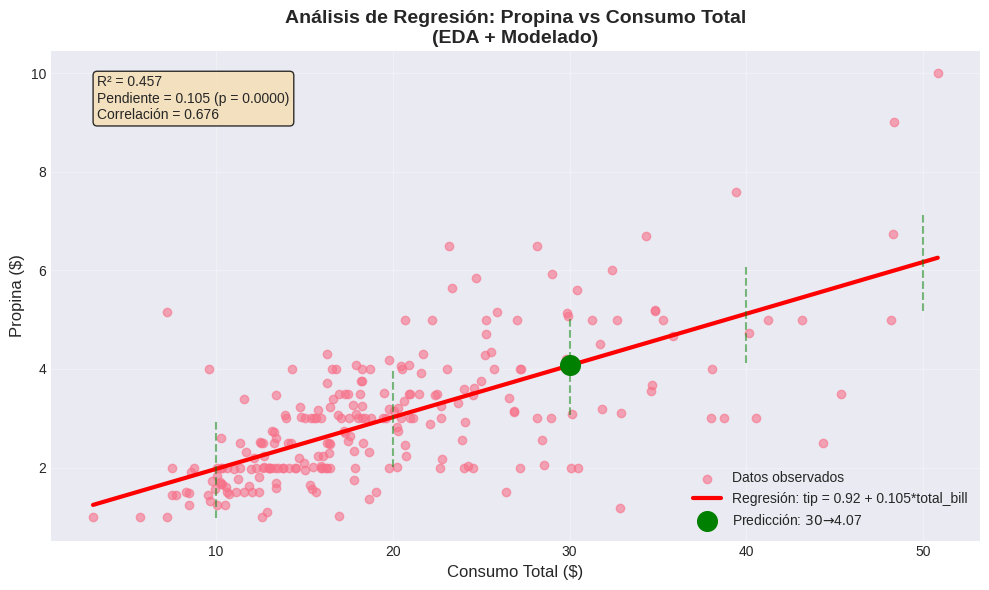

In [ ]:
# ====================
# 8. VISUALIZACIÓN FINAL - Todo junto
# ====================
fig, ax = plt.subplots(figsize=(10, 6))

# Scatterplot
scatter = ax.scatter(df['total_bill'], df['tip'],
                     alpha=0.6, label='Datos observados')

# Línea de regresión
x_range = np.linspace(df['total_bill'].min(), df['total_bill'].max(), 100)
y_pred = intercepto + pendiente * x_range
ax.plot(x_range, y_pred, color='red', linewidth=3,
        label=f'Regresión: tip = {intercepto:.2f} + {pendiente:.3f}*total_bill')

# Banda de confianza (opcional - requiere más cálculo)
# Para simplificar, mostremos predicciones para algunos puntos
sample_points = [10, 20, 30, 40, 50]
for point in sample_points:
    pred = intercepto + pendiente * point
    ax.plot([point, point], [pred-1, pred+1], 'g--', alpha=0.5)

# Destacar predicciones de ejemplo
ax.scatter([consumo_ejemplo], [propina_predicha], color='green',
           s=200, zorder=5, label=f'Predicción: ${consumo_ejemplo} → ${propina_predicha:.2f}')

ax.set_xlabel('Consumo Total ($)', fontsize=12)
ax.set_ylabel('Propina ($)', fontsize=12)
ax.set_title('Análisis de Regresión: Propina vs Consumo Total\n(EDA + Modelado)',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Añadir texto con métricas
textstr = '\n'.join((
    f'R² = {r_cuadrado:.3f}',
    f'Pendiente = {pendiente:.3f} (p = {p_valor:.4f})',
    f'Correlación = {correlation:.3f}'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()



## Paso 9: Resumen

Todo análisis debe culminar con conclusiones accionables.

### Estructura de un buen resumen ejecutivo:

**1. Pregunta inicial:** ¿Qué queríamos responder?
**2. Hallazgos principales:** ¿Qué descubrimos?
**3. Limitaciones:** ¿Qué no podemos concluir?
**4. Próximos pasos:** ¿Qué deberíamos hacer ahora?

**Recuerda:** La regresión nos muestra correlación, NO causalidad. Podemos decir "están relacionados", pero no "uno causa el otro" sin más evidencia.

In [ ]:
# ====================
# 9. RESUMEN
# ====================
print("\n" + "="*60)
print("📋 RESUMEN DEL ANÁLISIS")
print("="*60)

print("🔍 PREGUNTA INICIAL: ¿Cómo se relaciona el monto de la cuenta con la propina?")
print()
print("📊 HALLAZGOS PRINCIPALES:")
print(f"1. Existe una relación lineal positiva: a mayor consumo, mayor propina.")
print(f"2. Por cada $1 adicional en la cuenta, la propina aumenta ${pendiente:.3f} en promedio.")
print(f"3. Esto equivale aproximadamente a una propina del {pendiente*100:.1f}%.")
print(f"4. El consumo total explica el {r_cuadrado*100:.1f}% de la variación en propinas.")
print(f"5. La relación es estadísticamente significativa (p = {p_valor:.4f}).")
print()
print("⚠️ LIMITACIONES:")
print("• El modelo no considera otros factores importantes (día, hora, tamaño del grupo).")
print("• Los residuos muestran cierta heterocedasticidad (más variación en cuentas grandes).")
print("• R² = {r_cuadrado:.3f} → hay otros factores influyendo en la propina.")
print()
print("🎯 PRÓXIMOS PASOS (EDA Avanzado):")
print("1. Incluir variables categóricas (día, sexo, fumador/no fumador).")
print("2. Probar interacciones (¿la relación es igual para hombres y mujeres?).")
print("3. Considerar transformaciones (¿log(tip) vs total_bill mejora el ajuste?).")


📋 RESUMEN DEL ANÁLISIS
🔍 PREGUNTA INICIAL: ¿Cómo se relaciona el monto de la cuenta con la propina?

📊 HALLAZGOS PRINCIPALES:
1. Existe una relación lineal positiva: a mayor consumo, mayor propina.
2. Por cada $1 adicional en la cuenta, la propina aumenta $0.105 en promedio.
3. Esto equivale aproximadamente a una propina del 10.5%.
4. El consumo total explica el 45.7% de la variación en propinas.
5. La relación es estadísticamente significativa (p = 0.0000).

⚠️ LIMITACIONES:
• El modelo no considera otros factores importantes (día, hora, tamaño del grupo).
• Los residuos muestran cierta heterocedasticidad (más variación en cuentas grandes).
• R² = {r_cuadrado:.3f} → hay otros factores influyendo en la propina.

🎯 PRÓXIMOS PASOS (EDA Avanzado):
1. Incluir variables categóricas (día, sexo, fumador/no fumador).
2. Probar interacciones (¿la relación es igual para hombres y mujeres?).
3. Considerar transformaciones (¿log(tip) vs total_bill mejora el ajuste?).


## Paso 10: Análisis por Subgrupos - Profundizando en el EDA

El EDA verdadero explora múltiples dimensiones.

### ¿Por qué analizar por categorías?
- Las relaciones pueden diferir entre grupos
- Podemos descubrir efectos de interacción
- Enriquece nuestro entendimiento del fenómeno

**En nuestro ejemplo:**
¿La relación entre consumo y propina es igual para hombres y mujeres?
¿Los fumadores dan propinas diferentes a los no fumadores?
¿Varía la propina por día de la semana?

**Enfoque:**
1. Separar datos por categoría
2. Ajustar modelos separados
3. Comparar coeficientes
4. Verificar diferencias estadísticas


🌟 BONUS: EDA con variable categórica (sexo)


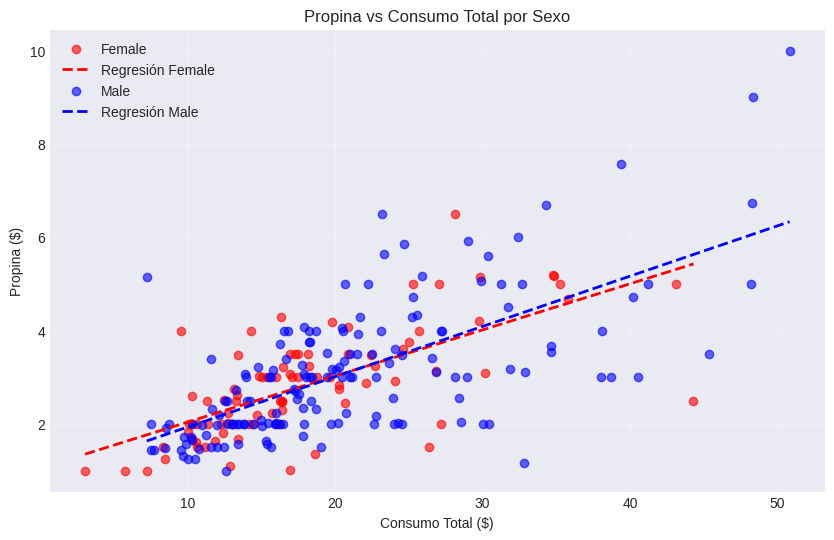


Comparación de pendientes por sexo:
Female: Pendiente = 0.099 (IC95%: 0.076 - 0.122)
Male: Pendiente = 0.108 (IC95%: 0.089 - 0.127)


In [ ]:
# ====================
# 10. BONUS: Regresión con categorías
# ====================
print("\n" + "="*60)
print("🌟 BONUS: EDA con variable categórica (sexo)")
print("="*60)

fig, ax = plt.subplots(figsize=(10, 6))

# Scatterplot por sexo
colors = {'Male': 'blue', 'Female': 'red'}
for sex in df['sex'].unique():
    subset = df[df['sex'] == sex]
    ax.scatter(subset['total_bill'], subset['tip'],
               alpha=0.6, label=sex, color=colors[sex])

    # Regresión por grupo
    X_sub = sm.add_constant(subset['total_bill'])
    model_sub = sm.OLS(subset['tip'], X_sub).fit()
    x_range = np.linspace(subset['total_bill'].min(), subset['total_bill'].max(), 100)
    y_pred_sub = model_sub.params['const'] + model_sub.params['total_bill'] * x_range
    ax.plot(x_range, y_pred_sub, color=colors[sex], linewidth=2,
            linestyle='--', label=f'Regresión {sex}')

ax.set_xlabel('Consumo Total ($)')
ax.set_ylabel('Propina ($)')
ax.set_title('Propina vs Consumo Total por Sexo')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# Comparar pendientes
print("\nComparación de pendientes por sexo:")
for sex in df['sex'].unique():
    subset = df[df['sex'] == sex]
    X_sub = sm.add_constant(subset['total_bill'])
    model_sub = sm.OLS(subset['tip'], X_sub).fit()
    print(f"{sex}: Pendiente = {model_sub.params['total_bill']:.3f} " +
          f"(IC95%: {model_sub.conf_int().loc['total_bill', 0]:.3f} - " +
          f"{model_sub.conf_int().loc['total_bill', 1]:.3f})")

## Lecciones Clave y Mejores Prácticas

### Para Recordar Siempre:

1. **EDA primero, modelado después:** Nunca corras un modelo sin antes explorar tus datos visualmente.

2. **Interpretar en contexto:** Un coeficiente de 0.15 es técnicamente correcto, pero "15% de propina" es significativo.

3. **Verificar supuestos:** Un modelo que viola sus supuestos puede dar conclusiones engañosas.

4. **Pensar críticamente:** Pregunta siempre: "¿Esto tiene sentido?"

5. **Comunicar efectivamente:** Adapta tu explicación al nivel de tu audiencia.

### Errores Comunes a Evitar:

- Confundir correlación con causalidad
- Ignorar valores atípicos influyentes
- Olvidar verificar supuestos
- Sobreinterpretar R² bajo
- No considerar variables de confusión

### Próximos Pasos en Tu Aprendizaje:

1. **Regresión múltiple:** Incluir más variables predictoras
2. **Transformaciones:** Logaritmos, raíces cuadradas para relaciones no lineales
3. **Validación cruzada:** Evaluar desempeño predictivo
4. **Regularización:** Lidiar con multicolinealidad (Ridge, Lasso)
5. **Modelos no lineales:** Cuando la relación no es recta

## Ejercicios de Aplicación

### Para Practicar lo Aprendido:

1. **Modifica el modelo:**
   - ¿Qué pasa si usas `tip_percentage` en lugar de `tip`?
   - ¿Cambia la interpretación de los coeficientes?

2. **Incluye otra variable:**
   - Agrega `size` (tamaño del grupo) al modelo
   - ¿Mejora el R²? ¿Cómo interpretas el nuevo coeficiente?

3. **Transforma variables:**
   - Prueba `np.log(tip)` vs `total_bill`
   - ¿Mejoran los diagnósticos del modelo?

4. **Analiza otros subgrupos:**
   - Compara la relación por día de la semana
   - ¿Hay días con propinas más generosas?

5. **Evalúa valores atípicos:**
   - Elimina las 5 observaciones con mayor error
   - ¿Cambia significativamente el modelo?

## Recursos Adicionales y Referencias

### Para Profundizar:

**Librerías de Python:**
- `statsmodels`: Análisis estadístico detallado
- `scikit-learn`: Modelado predictivo
- `seaborn`: Visualización estadística

**Conceptos Estadísticos:**
- Intervalos de confianza vs predicción
- Pruebas de hipótesis para coeficientes
- ANOVA para comparación de modelos

**Lecturas Recomendadas:**
1. "An Introduction to Statistical Learning" (James et al.)
2. "Statistical Rethinking" (McElreath)
3. "The Elements of Statistical Learning" (Hastie et al.)

**Cheatsheet Mental para Regresión:**
1. Explora visualmente
2. Formula el modelo
3. Ajusta y diagnostica
4. Interpreta en contexto
5. Comunica con claridad